In [1]:
import pandas as pd
import urllib
import csv
import japanize_matplotlib

東京電力のページから2020年の「エリアの需給実績公表」の内容を確認する。

# データ取得

In [2]:
url = 'https://www.tepco.co.jp/forecast/html/images/area-2020.csv'

先頭部分が以下のようになっているので、適当に読み飛ばすようにする。

```
単位[万kWh]
DATE,TIME,東京エリア需要,供給力
,,,原子力,火力,水力,地熱,バイオマス,太陽光発電実績,太陽光出力制御量,風力発電実績,風力出力制御量,揚水,連系線,合計
2020/4/1,0:00,2742,0,2203,161,0,43,0,0,11,0,0,324,2742
```

2行読み飛ばし、3行目の列名が足りていないのでリネームする。

In [3]:
data = pd.read_csv(url, encoding='shift=jis',skiprows=2).rename(columns={'Unnamed: 0':'date', 'Unnamed: 1':'time', 'Unnamed: 2':'tokyo_demand'})

In [4]:
data

,date,time,tokyo_demand,原子力,火力,水力,地熱,バイオマス,太陽光発電実績,太陽光出力制御量,風力発電実績,風力出力制御量,揚水,連系線,合計
0,2020/4/1,0:00,2742,0,2203,161,0,43,0,0,11,0,0,324,2742
1,2020/4/1,1:00,2595,0,2054,164,0,43,0,0,11,0,0,323,2595
2,2020/4/1,2:00,2555,0,2012,165,0,43,0,0,11,0,0,324,2555
3,2020/4/1,3:00,2556,0,2010,174,0,43,0,0,10,0,0,319,2556
4,2020/4/1,4:00,2582,0,2039,173,0,43,0,0,7,0,0,320,2582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021/3/31,19:00,3076,0,2040,214,0,39,0,0,12,0,483,288,3076
8756,2021/3/31,20:00,2945,0,2038,207,0,39,0,0,12,0,393,256,2945
8757,2021/3/31,21:00,2808,0,2185,187,0,39,0,0,12,0,102,283,2808
8758,2021/3/31,22:00,2675,0,2216,181,0,39,0,0,12,0,34,193,2675


上記のように、4月はじまり、3月終わりである。

# あとで使いやすいように加工

In [5]:
data['datetime'] = data['date'].str.cat(data['time'], sep=' ')

In [6]:
data

,date,time,tokyo_demand,原子力,火力,水力,地熱,バイオマス,太陽光発電実績,太陽光出力制御量,風力発電実績,風力出力制御量,揚水,連系線,合計,datetime
0,2020/4/1,0:00,2742,0,2203,161,0,43,0,0,11,0,0,324,2742,2020/4/1 0:00
1,2020/4/1,1:00,2595,0,2054,164,0,43,0,0,11,0,0,323,2595,2020/4/1 1:00
2,2020/4/1,2:00,2555,0,2012,165,0,43,0,0,11,0,0,324,2555,2020/4/1 2:00
3,2020/4/1,3:00,2556,0,2010,174,0,43,0,0,10,0,0,319,2556,2020/4/1 3:00
4,2020/4/1,4:00,2582,0,2039,173,0,43,0,0,7,0,0,320,2582,2020/4/1 4:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021/3/31,19:00,3076,0,2040,214,0,39,0,0,12,0,483,288,3076,2021/3/31 19:00
8756,2021/3/31,20:00,2945,0,2038,207,0,39,0,0,12,0,393,256,2945,2021/3/31 20:00
8757,2021/3/31,21:00,2808,0,2185,187,0,39,0,0,12,0,102,283,2808,2021/3/31 21:00
8758,2021/3/31,22:00,2675,0,2216,181,0,39,0,0,12,0,34,193,2675,2021/3/31 22:00


集計するために日付文字列を分割し、数値化しておく。

In [7]:
data = pd.concat([data['date'].str.split('/', expand=True).rename(columns={0:'year', 1:'month', 2:'day'}), data], axis=1)
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [8]:
data

,year,month,day,date,time,tokyo_demand,原子力,火力,水力,地熱,バイオマス,太陽光発電実績,太陽光出力制御量,風力発電実績,風力出力制御量,揚水,連系線,合計,datetime
0,2020,4,1,2020/4/1,0:00,2742,0,2203,161,0,43,0,0,11,0,0,324,2742,2020/4/1 0:00
1,2020,4,1,2020/4/1,1:00,2595,0,2054,164,0,43,0,0,11,0,0,323,2595,2020/4/1 1:00
2,2020,4,1,2020/4/1,2:00,2555,0,2012,165,0,43,0,0,11,0,0,324,2555,2020/4/1 2:00
3,2020,4,1,2020/4/1,3:00,2556,0,2010,174,0,43,0,0,10,0,0,319,2556,2020/4/1 3:00
4,2020,4,1,2020/4/1,4:00,2582,0,2039,173,0,43,0,0,7,0,0,320,2582,2020/4/1 4:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021,3,31,2021/3/31,19:00,3076,0,2040,214,0,39,0,0,12,0,483,288,3076,2021/3/31 19:00
8756,2021,3,31,2021/3/31,20:00,2945,0,2038,207,0,39,0,0,12,0,393,256,2945,2021/3/31 20:00
8757,2021,3,31,2021/3/31,21:00,2808,0,2185,187,0,39,0,0,12,0,102,283,2808,2021/3/31 21:00
8758,2021,3,31,2021/3/31,22:00,2675,0,2216,181,0,39,0,0,12,0,34,193,2675,2021/3/31 22:00


# 集計

## 最大値を月毎に抽出して並べてみる。

年と月でグループ化し、グループ内の東京エリアの需要最大値を探す。

In [9]:
tokyo_demand_by_day = data.groupby([data['year'], data['month']]).max('tokyo_demand').loc[:,['tokyo_demand']]
# tokyo_demand_by_day = data.groupby([data['year'], data['month']]).max('tokyo_demand')

In [10]:
tokyo_demand_by_day

tokyo_demand
year month              
2020 4              4055
     5              3335
     6              4345
     7              4497
     8              5604
     9              5570
     10             3661
     11             3943
     12             4722
2021 1              5094
     2              4862
     3              4337

<AxesSubplot:xlabel='year,month'>

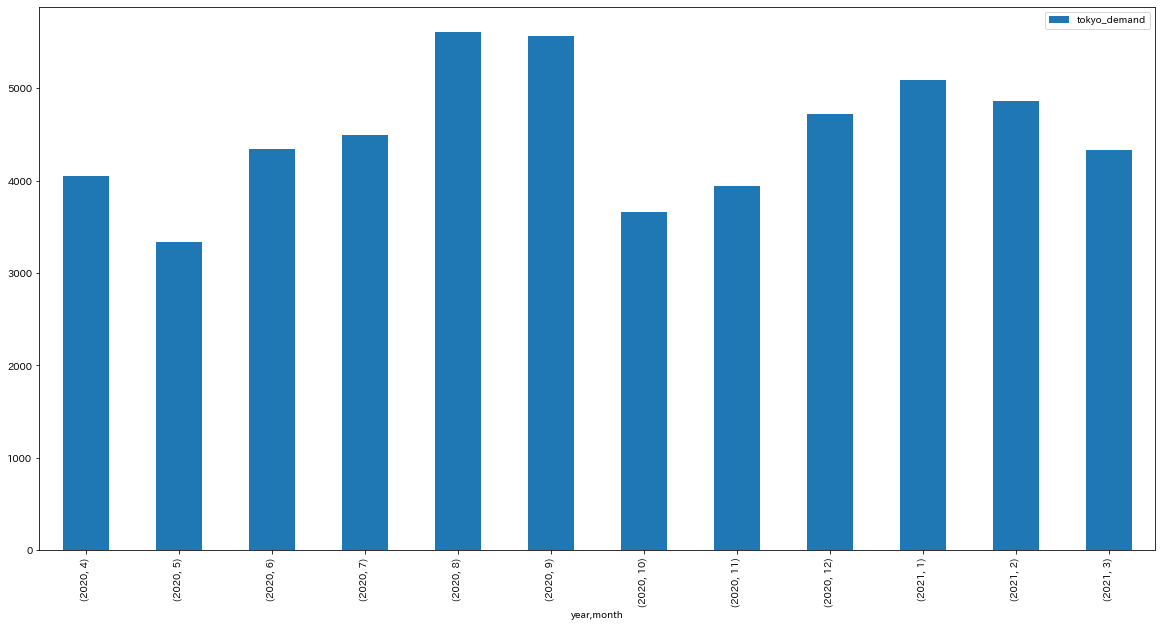

In [11]:
tokyo_demand_by_day.plot(kind='bar', figsize=(20,10),)

予感はあったが、8月9月の需要最大値が、2020年度全体の中でも最大。
一方で、1月にもピークの頂上がある。

## 気になるのは東京エリアの需要数値と供給の合計が一致していること

In [12]:
data[['date','time','tokyo_demand', '合計']]

,date,time,tokyo_demand,合計
0,2020/4/1,0:00,2742,2742
1,2020/4/1,1:00,2595,2595
2,2020/4/1,2:00,2555,2555
3,2020/4/1,3:00,2556,2556
4,2020/4/1,4:00,2582,2582
...,...,...,...,...
8755,2021/3/31,19:00,3076,3076
8756,2021/3/31,20:00,2945,2945
8757,2021/3/31,21:00,2808,2808
8758,2021/3/31,22:00,2675,2675


過去の実績ということなので、需要に対して必要な共有だけした、ということか。

# 1日のピーク使用時の情報を取得してみる。

In [13]:
peak_url = 'https://www.tepco.co.jp/forecast/html/images/juyo-result-2020-j.csv'

In [14]:
peak_data = pd.read_csv(peak_url, encoding='shift=jis',skiprows=2)
peak_data['datetime'] = peak_data['DATE'].str.cat(peak_data['TIME'], sep=' ')
peak_data

,DATE,TIME,曜日,実績(万kW),ピーク時供給力,使用率,使用率ピーク時時間帯,使用率ピーク時需要電力,使用率ピーク時供給力,使用率ピーク時使用率,datetime
0,2020/1/1,20:00,3,3107,3704,83,20:00,3107,3704,83,2020/1/1 20:00
1,2020/1/2,19:00,4,3196,3852,82,19:00,3196,3852,82,2020/1/2 19:00
2,2020/1/3,19:00,5,3263,3892,83,19:00,3263,3892,83,2020/1/3 19:00
3,2020/1/4,18:00,6,3486,4286,81,17:00,3441,4215,81,2020/1/4 18:00
4,2020/1/5,19:00,0,3778,4682,80,19:00,3778,4682,80,2020/1/5 19:00
...,...,...,...,...,...,...,...,...,...,...,...
361,2020/12/27,18:00,0,3651,4174,87,18:00,3651,4174,87,2020/12/27 18:00
362,2020/12/28,9:00,1,3912,4962,78,8:00,3807,4665,81,2020/12/28 9:00
363,2020/12/29,18:00,2,3568,4166,85,17:00,3543,4025,88,2020/12/29 18:00
364,2020/12/30,19:00,3,3566,3972,89,21:00,3420,3735,91,2020/12/30 19:00


1日単位でピークの生じた時刻が記載されているため、これを使って過去の供給に関する情報と結合できそう。

In [15]:
with_pead_data = data.merge(peak_data, on='datetime' ,how='left')
with_pead_data

,year,month,day,date,time,tokyo_demand,原子力,火力,水力,地熱,...,DATE,TIME,曜日,実績(万kW),ピーク時供給力,使用率,使用率ピーク時時間帯,使用率ピーク時需要電力,使用率ピーク時供給力,使用率ピーク時使用率
0,2020,4,1,2020/4/1,0:00,2742,0,2203,161,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,4,1,2020/4/1,1:00,2595,0,2054,164,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,4,1,2020/4/1,2:00,2555,0,2012,165,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,4,1,2020/4/1,3:00,2556,0,2010,174,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,4,1,2020/4/1,4:00,2582,0,2039,173,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021,3,31,2021/3/31,19:00,3076,0,2040,214,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,2021,3,31,2021/3/31,20:00,2945,0,2038,207,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,2021,3,31,2021/3/31,21:00,2808,0,2185,187,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,2021,3,31,2021/3/31,22:00,2675,0,2216,181,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


「データの期間が違う」、「ピークじゃない時間帯はNaNになる」ということだけ注意。

試しに、ピーク時間帯だけ抜き出してみる。簡単な確認のため。

In [16]:
pd.set_option('display.max_columns', 50)
with_pead_data.dropna(how='any')

,year,month,day,date,time,tokyo_demand,原子力,火力,水力,地熱,バイオマス,太陽光発電実績,太陽光出力制御量,風力発電実績,風力出力制御量,揚水,連系線,合計,datetime,DATE,TIME,曜日,実績(万kW),ピーク時供給力,使用率,使用率ピーク時時間帯,使用率ピーク時需要電力,使用率ピーク時供給力,使用率ピーク時使用率
11,2020,4,1,2020/4/1,11:00,3863,0,2900,184,0,43,308,0,9,0,11,408,3863,2020/4/1 11:00,2020/4/1,11:00,3.0,3863.0,4692.0,82.0,18:00,3830.0,4338.0,88.0
42,2020,4,2,2020/4/2,18:00,3580,0,2674,231,0,43,0,0,28,0,196,408,3580,2020/4/2 18:00,2020/4/2,18:00,4.0,3580.0,4361.0,82.0,18:00,3580.0,4361.0,82.0
66,2020,4,3,2020/4/3,18:00,3424,0,2381,214,0,42,0,0,2,0,428,357,3424,2020/4/3 18:00,2020/4/3,18:00,5.0,3424.0,4188.0,81.0,18:00,3424.0,4188.0,81.0
90,2020,4,4,2020/4/4,18:00,2974,0,1788,191,0,42,0,0,21,0,539,393,2974,2020/4/4 18:00,2020/4/4,18:00,6.0,2974.0,3992.0,74.0,18:00,2974.0,3992.0,74.0
115,2020,4,5,2020/4/5,19:00,3294,0,2607,186,0,43,0,0,24,0,67,367,3294,2020/4/5 19:00,2020/4/5,19:00,0.0,3294.0,4026.0,81.0,18:00,3286.0,3988.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,2020,12,27,2020/12/27,18:00,3651,0,2775,145,0,38,0,0,3,0,298,392,3651,2020/12/27 18:00,2020/12/27,18:00,0.0,3651.0,4174.0,87.0,18:00,3651.0,4174.0,87.0
6513,2020,12,28,2020/12/28,9:00,3912,0,2741,108,0,37,449,0,4,0,84,489,3912,2020/12/28 9:00,2020/12/28,9:00,1.0,3912.0,4962.0,78.0,8:00,3807.0,4665.0,81.0
6546,2020,12,29,2020/12/29,18:00,3568,0,2747,134,0,35,0,0,10,0,187,455,3568,2020/12/29 18:00,2020/12/29,18:00,2.0,3568.0,4166.0,85.0,17:00,3543.0,4025.0,88.0
6571,2020,12,30,2020/12/30,19:00,3566,0,2668,131,0,34,0,0,29,0,265,439,3566,2020/12/30 19:00,2020/12/30,19:00,3.0,3566.0,3972.0,89.0,21:00,3420.0,3735.0,91.0


左側テーブル：供給情報の「合計」列の値が、右側テーブル：需給情報の「実績（万kW）」がわかる。

一方、右側テーブル：需給情報の使用率ピーク時供給力は異なっていることがわかる。

さらに言うと、「使用率ピーク時需要電力」も異なっていることもある、というのがわかる。

主要部分だけ取り出す。

In [17]:
check_peak = with_pead_data.loc[:, ['datetime', '合計', '実績(万kW)', 'ピーク時供給力', '使用率ピーク時需要電力']].set_index('datetime')
check_peak

,合計,実績(万kW),ピーク時供給力,使用率ピーク時需要電力
datetime,,,,
2020/4/1 0:00,2742,NaN,NaN,NaN
2020/4/1 1:00,2595,NaN,NaN,NaN
2020/4/1 2:00,2555,NaN,NaN,NaN
2020/4/1 3:00,2556,NaN,NaN,NaN
2020/4/1 4:00,2582,NaN,NaN,NaN
...,...,...,...,...
2021/3/31 19:00,3076,NaN,NaN,NaN
2021/3/31 20:00,2945,NaN,NaN,NaN
2021/3/31 21:00,2808,NaN,NaN,NaN


影響の大きそうな8月だけ取り出す。

In [20]:
aug = check_peak.query('index.str.startswith("2020/8")')
aug

,合計,実績(万kW),ピーク時供給力,使用率ピーク時需要電力
datetime,,,,
2020/8/1 0:00,2698,NaN,NaN,NaN
2020/8/1 1:00,2513,NaN,NaN,NaN
2020/8/1 2:00,2430,NaN,NaN,NaN
2020/8/1 3:00,2410,NaN,NaN,NaN
2020/8/1 4:00,2395,NaN,NaN,NaN
...,...,...,...,...
2020/8/31 19:00,4001,NaN,NaN,NaN
2020/8/31 20:00,3736,NaN,NaN,NaN
2020/8/31 21:00,3482,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

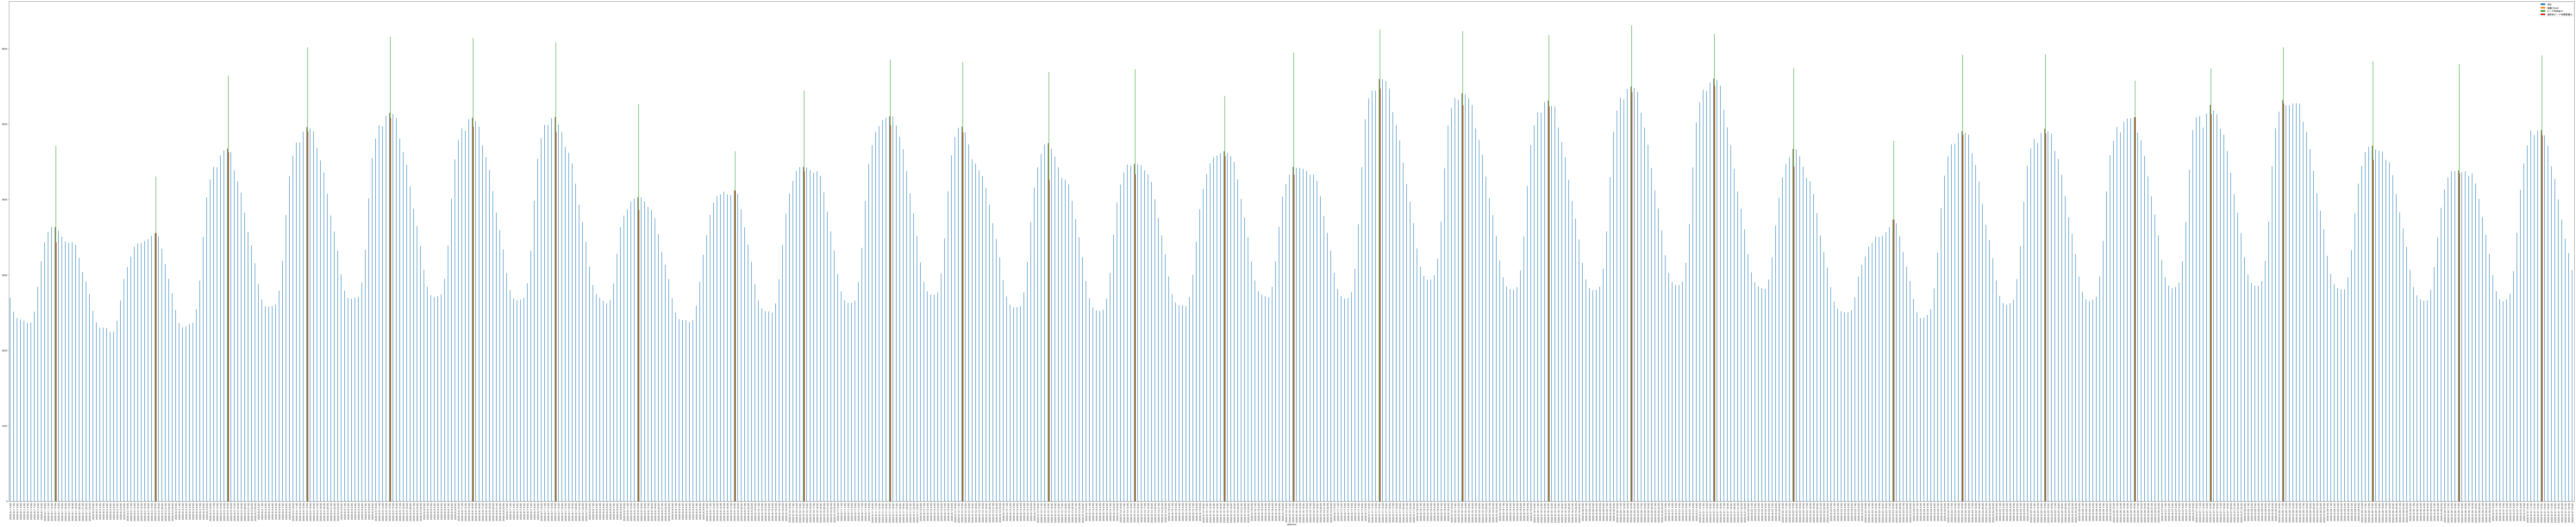

In [33]:
aug.plot(kind='bar',figsize=(200,40))

ピーク時のときだ供給力情報があるせいで、そこが突出して見づらい。

試しに、ピーク時だけ取り出してみる。

In [34]:
aug.dropna()

,合計,実績(万kW),ピーク時供給力,使用率ピーク時需要電力
datetime,,,,
2020/8/1 13:00,3635,3635.0,4714.0,3434.0
2020/8/2 18:00,3554,3554.0,4305.0,3554.0
2020/8/3 15:00,4675,4675.0,5643.0,4628.0
2020/8/4 14:00,4960,4960.0,6016.0,4902.0
2020/8/5 14:00,5148,5148.0,6158.0,5077.0
2020/8/6 14:00,5086,5086.0,6142.0,4965.0
2020/8/7 14:00,5095,5095.0,6085.0,4894.0
2020/8/8 14:00,4031,4031.0,5266.0,3861.0
2020/8/9 18:00,4119,4119.0,4641.0,4119.0


<AxesSubplot:xlabel='datetime'>

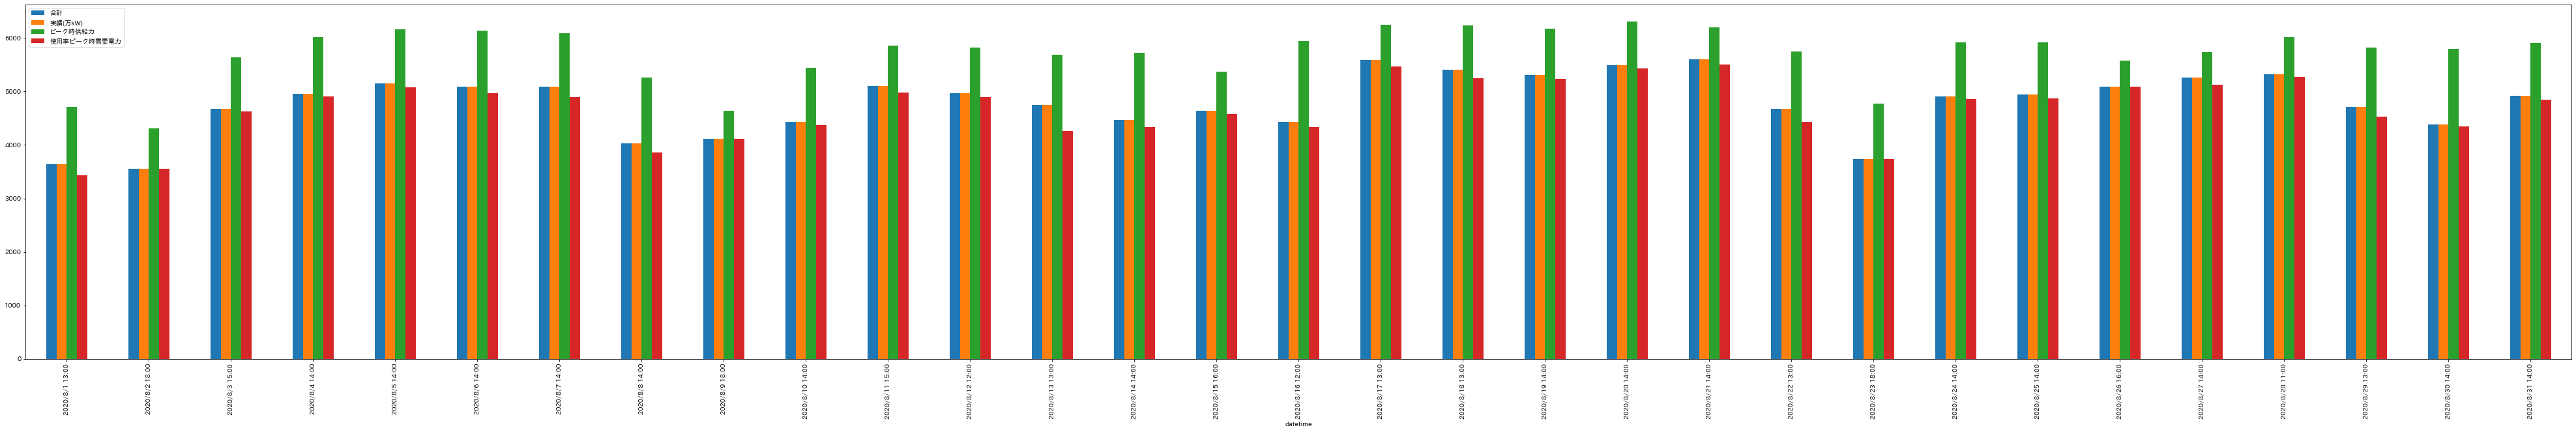

In [39]:
aug.dropna().plot(kind='bar', figsize=(70, 10))